In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class batsmanStats(TypedDict):
    runs: int
    balls_faced: int
    fours: int
    sixes: int


    strike_rate: float
    bpb: float  # balls per boundary
    boundry_percentage: float


In [12]:
def calculate_strike_rate(state: batsmanStats) -> batsmanStats:
    strike_rate = (state["runs"] / state["balls_faced"]) * 100
    return {"strike_rate": strike_rate}

def calculate_bpb(state: batsmanStats) -> batsmanStats:
    bpb = state["balls_faced"] / (state["fours"] + state["sixes"])
    return {"bpb": bpb}

def calculate_boundary_percentage(state: batsmanStats) -> batsmanStats:
    total_boundaries = state["fours"] + state["sixes"]
    boundary_percentage = (total_boundaries / state["balls_faced"]) * 100
    return {"boundry_percentage": boundary_percentage}  

def summary(state: batsmanStats) -> batsmanStats:
    summary = f"""
strike Rate: {state['strike_rate']:.2f} \n
Balls per Boundary: {state['bpb']:.2f} \n
Boundary Percentage: {state['boundry_percentage']:.2f}%
"""
    return {"summary": summary}

In [13]:
graph = StateGraph(batsmanStats)

graph.add_node("calculate_strike_rate", calculate_strike_rate)
graph.add_node("calculate_bpb", calculate_bpb)
graph.add_node("calculate_boundary_percentage", calculate_boundary_percentage)
graph.add_node("summary", summary)

graph.add_edge(START, "calculate_strike_rate")
graph.add_edge(START, "calculate_bpb")
graph.add_edge(START, "calculate_boundary_percentage")

graph.add_edge("calculate_strike_rate", "summary")
graph.add_edge("calculate_bpb", "summary")
graph.add_edge("calculate_boundary_percentage", "summary")

graph.add_edge("summary", END)

workflow = graph.compile()

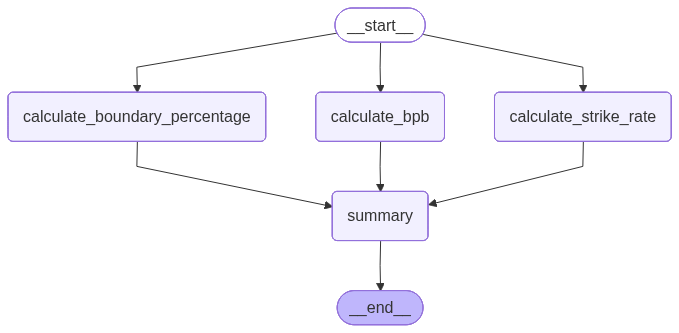

In [10]:
workflow

In [15]:
initial_state = {
    "runs": 150,
    "balls_faced": 120,
    "fours": 15,
    "sixes": 5
}

final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 150, 'balls_faced': 120, 'fours': 15, 'sixes': 5, 'strike_rate': 125.0, 'bpb': 6.0, 'boundry_percentage': 16.666666666666664}
